# Evaluation of a sound structure and preparation

**Author:** Fábio Paraíso

**Achievement:** I understood what each of the basic transformation is doing to the audio files.


## Introduction

In this notebook, and since it is my first time working with audio files, I try to understand their structure and understand the type of pre-treaments that are normally applied.

Some of the evaluations will be:
* Preparation of the data to evaluation
* Evaluate the structure of the files
* Test the pre-treatments of the audio files

Most of this initial evaluation is based on this [post](https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5).

In [1]:
%load_ext watermark
%watermark

Last updated: 2021-07-08T20:32:00.377451+01:00

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.25.0

Compiler    : MSC v.1928 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit



### Import modules

In [2]:
# System
import sys

# Logging
import logging
logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

# user modules
from speech import data, visualization

### Load the audio file

Each of the audio files has two type of information when we load it using pytorch:
* sig: represents the signal
* sr:  represents the sampling rate

In [3]:
sound_file = '../data/7383-3-0-0.wav'
sig, sr = data.load_audio(sound_file)

Loading audio file


### Evaluate signal

I start by evaluating each of the outputs. First the sampling rate and then the signal.

In [4]:
# sampling rate
sr

44100

This audio file has a sampling rate of 44100 Hz.

In [5]:
# signal
sig

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0122, -0.0118, -0.0118],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0035, -0.0034, -0.0032]])

Signal tensor is formed by two lists meaning that it is a stereo sound (important in the next steps).

In [6]:
sig.shape

torch.Size([2, 176400])

Signal also has arround 176K per channel.

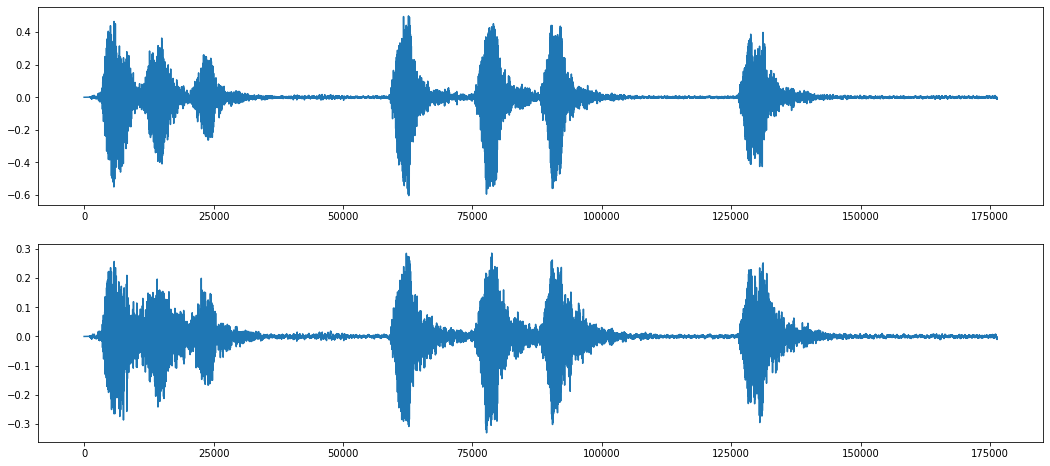

In [7]:
# audio visualization
visualization.plot_audio(sig)

Both inputs are very similar, but one seems to be less strong than the other.

### Mel Spectrogram

Here I convert the wave file to a mel spectrogram to better understand the transformation that are normally used. <p>
At this point I'm still new to this so I'm not sure what it is happening when I convert a sound wave to a mel spectrogram. I'm just testing things and see the outputs.

In [8]:
mel_spec_db = data.db_mel_spectrogram(sig, sr)

Converting signal to db mel spectrogram


In [9]:
mel_spec_db.shape

torch.Size([2, 64, 345])

Next I want to visualize the mel spectrogram

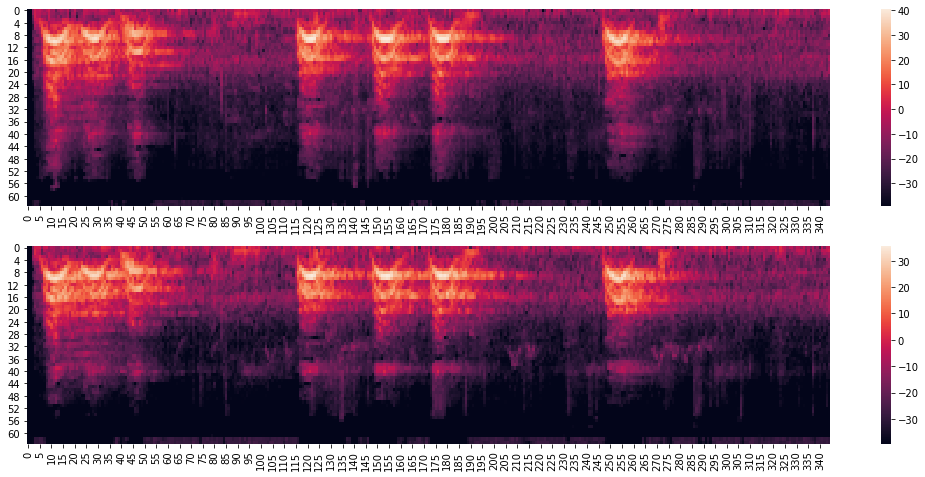

In [10]:
# visualize the spectrogram
visualization.plot_spectrogram(mel_spec_db)

This are then the images that are supplied to train the neural network in recognizing the type of sounds.

As it can be seen they have a very particular shape.